<a href="https://colab.research.google.com/github/AbdulWahabRaza123/NLP/blob/main/EmailClassificationUsingBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [9]:
#checking value count
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
#our dataset is imbalance because there are lot of the ham emails but spam emails are less
747/4825	

0.15481865284974095

In [11]:
#checking spam emails
df_spam=df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [12]:
#checking ham emails
df_ham=df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [14]:
#Now we can check the ham emails
df_ham.sample(2)

,Category,Message
2813,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
655,ham,Did u got that persons story


In [17]:
df_ham_downsampling=df_ham.sample(df_spam.shape[0])
df_ham_downsampling.shape

(747, 2)

In [18]:
# How we got the equal number of samples of spam emails from ham emails
df_ham_downsampling.sample(2)

,Category,Message
364,ham,Busy here. Trying to finish for new year. I am...
3405,ham,Then ü ask dad to pick ü up lar... Ü wan 2 sta...


In [20]:
#Now I am going to merge the spam and ham emails to balance them
df_balanced=pd.concat([df_spam,df_ham_downsampling])
df_balanced.shape

(1494, 2)

In [21]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [22]:
df_balanced.sample(5)

,Category,Message
5443,spam,You have won a guaranteed 32000 award or maybe...
1741,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
5018,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
3640,ham,Wat's da model num of ur phone?
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...


In [23]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
427,ham,aathi..where are you dear..,0
1544,spam,Hello from Orange. For 1 month's free access t...,1
1673,spam,URGENT! We are trying to contact U. Todays dra...,1
5364,spam,Call 09095350301 and send our girls into eroti...,1
3965,ham,"If e timing can, then i go w u lor...",0


In [24]:
#Now going to split the traiining set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced['Message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [25]:
X_train.head(5)

4667                             Not..tel software name..
3160         Are you up for the challenge? I know i am :)
4725    FREE GAME. Get Rayman Golf 4 FREE from the O2 ...
985                          Yo guess what I just dropped
1764    Joy's father is John. Then John is the NAME of...
Name: Message, dtype: object

In [26]:
encoder_url='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [28]:
bert_preprocess=hub.KerasLayer(preprocess_url)
bert_encoder=hub.KerasLayer(encoder_url)

In [29]:
def get_sentance_embading(sentances):
  preprocess_text=bert_preprocess(sentances)
  return bert_encoder(preprocess_text)['pooled_output']
get_sentance_embading([
    "My name is Abdul Wahab Raza",
    "I am student of Bahria University Islamabad"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.80802536, -0.5107293 , -0.66684   , ..., -0.8041296 ,
        -0.7245633 ,  0.80288917],
       [-0.9223693 , -0.6769724 , -0.93562555, ..., -0.90715474,
        -0.7530311 ,  0.9231758 ]], dtype=float32)>

In [30]:
e=get_sentance_embading([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [31]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606919 , -0.14219381,  0.4960461 , ...,  0.42165333,
        -0.532214  ,  0.80312175],
       [-0.86023223, -0.21242939,  0.4915689 , ...,  0.3979803 ,
        -0.60506296,  0.8447167 ],
       [-0.7128864 , -0.15463923,  0.38401636, ...,  0.352787  ,
        -0.5099134 ,  0.73474115],
       [-0.8253345 , -0.3555054 , -0.5906963 , ..., -0.01613662,
        -0.6141756 ,  0.87230295],
       [-0.7504134 , -0.26812598, -0.26689604, ...,  0.02839445,
        -0.5938098 ,  0.79749876],
       [-0.78544384, -0.299497  ,  0.41027427, ...,  0.5222542 ,
        -0.4957355 ,  0.81507534]], dtype=float32)>

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[3]],[e[4]])

array([[0.9872034]], dtype=float32)

In [38]:
#Bert Layer
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name="text")
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)

#neural network layer
l=tf.keras.layers.Dropout(0.1,name="dropout")(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation="sigmoid",name="output")(l)

#constructing final Model
model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [40]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS
)

In [41]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 521s 15s/step - loss: 0.6494 - accuracy: 0.6054 - precision: 0.6109 - recall: 0.5804
Epoch 2/10
35/35 [==============================] - 500s 14s/step - loss: 0.5348 - accuracy: 0.7839 - precision: 0.7741 - recall: 0.8018
Epoch 3/10
35/35 [==============================] - 503s 14s/step - loss: 0.4547 - accuracy: 0.8348 - precision: 0.8141 - recall: 0.8679
Epoch 4/10
35/35 [==============================] - 516s 15s/step - loss: 0.4186 - accuracy: 0.8429 - precision: 0.8345 - recall: 0.8554
Epoch 5/10
35/35 [==============================] - 499s 14s/step - loss: 0.3781 - accuracy: 0.8804 - precision: 0.8660 - recall: 0.9000
Epoch 6/10
35/35 [==============================] - 501s 14s/step - loss: 0.3579 - accuracy: 0.8848 - precision: 0.8748 - recall: 0.8982
Epoch 7/10
35/35 [==============================] - 506s 14s/step - loss: 0.3386 - accuracy: 0.8911 - precision: 0.8829 - recall: 0.9018
Epoch 8/10
35/35 [=======================

In [42]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 169s 14s/step - loss: 0.2646 - accuracy: 0.9198 - precision: 0.8867 - recall: 0.9626


[0.2646035850048065,
 0.9197860956192017,
 0.8866994976997375,
 0.9625668525695801]

In [44]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 181s 15s/step


In [46]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predicted)
cm

array([[164,  23],
       [  7, 180]])

Text(33.0, 0.5, 'Truth')

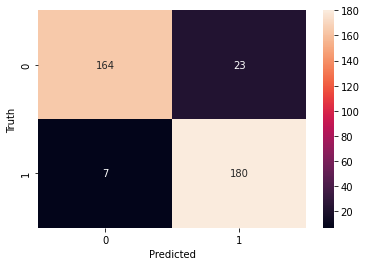

In [48]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       187
           1       0.89      0.96      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [50]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 5s 5s/step


array([[0.7594482 ],
       [0.8333033 ],
       [0.7793332 ],
       [0.20541649],
       [0.12385085]], dtype=float32)